## 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = './data/'
raw_data = pd.read_csv(data_path+'diabetes.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### simple EDA

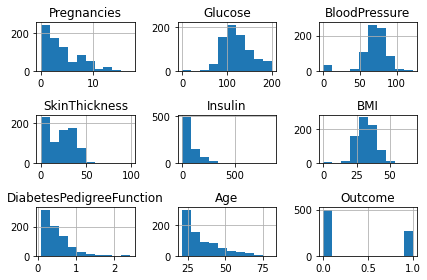

In [3]:
raw_data.hist()
plt.tight_layout()
plt.show()

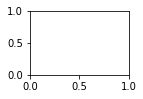

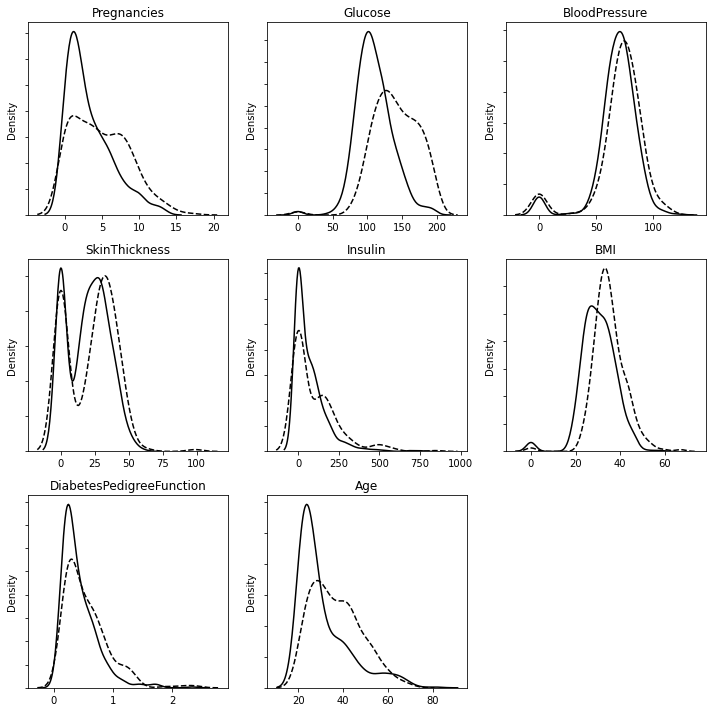

In [4]:
plt.subplot(3,3,3)
plt.figure(figsize=(10,10))

for idx, col in enumerate(raw_data.columns[:-1]):
    ax = plt.subplot(3,3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(raw_data.loc[raw_data.Outcome==0][col], hist=False, axlabel=False,
                 kde_kws={'linestyle':'-', 'color':'black', 'label':'No Diabetes'})
    sns.distplot(raw_data.loc[raw_data.Outcome==1][col], hist=False, axlabel=False,
                 kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
    ax.set_title(col)
    
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

In [5]:
raw_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
raw_data.loc[raw_data['Glucose']==0].shape

(5, 9)

In [7]:
print('Number of rows with 0 values\n')

for col in raw_data.columns:
    missing = raw_data.loc[raw_data[col]==0].shape[0]
    print(f'{col}: {missing}')

Number of rows with 0 values

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:
# replace 0 values to NAN

df = raw_data
cols = df.columns
cols = cols.drop(['Pregnancies', 'Outcome'])
cols

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
for col in cols:
    df[col] = df[col].replace(0, np.nan)
    
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# fill null values with mean

for col in cols:
    df[col] = df[col].fillna(df[col].mean())
    
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### data scaling

In [12]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


In [13]:
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,-3.330669e-16,3.515706e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


In [14]:
df_scaled.describe().loc[['mean', 'std', 'max', 'min']].round(4).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.349
std,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007,0.477
max,3.9066,2.5419,4.1027,7.9505,8.1262,5.0421,5.8836,4.0637,1.000
min,1.1419,2.5541,4.0042,2.5217,1.6659,2.0751,1.1896,1.0415,0.000


In [15]:
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

### model build-up

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [18]:
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200


2022-07-25 20:42:55.690019: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 0s 4ms/step - loss: 4.6531 - accuracy: 0.5475 - val_loss: 2.3792 - val_accuracy: 0.5571
Epoch 2/200
20/20 [==============================] - 0s 859us/step - loss: 1.3065 - accuracy: 0.6699 - val_loss: 1.6056 - val_accuracy: 0.6286
Epoch 3/200
20/20 [==============================] - 0s 868us/step - loss: 0.9402 - accuracy: 0.6618 - val_loss: 1.3695 - val_accuracy: 0.5857
Epoch 4/200
20/20 [==============================] - 0s 827us/step - loss: 0.8128 - accuracy: 0.6731 - val_loss: 1.1269 - val_accuracy: 0.5571
Epoch 5/200
20/20 [==============================] - 0s 840us/step - loss: 0.7260 - accuracy: 0.6828 - val_loss: 0.9517 - val_accuracy: 0.5571
Epoch 6/200
20/20 [==============================] - 0s 826us/step - loss: 0.7524 - accuracy: 0.6618 - val_loss: 0.9435 - val_accuracy: 0.5857
Epoch 7/200
20/20 [==============================] - 0s 797us/step - loss: 0.6568 - accuracy: 0.7005 - val_loss: 0.8505 - val_accuracy: 0.5286
Epoch 8/200
2

In [21]:
model.evaluate(x_train, y_train)

20/20 [==============================] - 0s 314us/step - loss: 0.4668 - accuracy: 0.7617


[0.4667842984199524, 0.761674702167511]

In [22]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 554us/step - loss: 0.6719 - accuracy: 0.7273


[0.6719056963920593, 0.7272727489471436]

## Cat V Dog

### https://velog.io/@sp1rit/%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B6%84%EB%A5%98

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow_datasets as tfds

In [9]:
# load cat v dog dataset from tensorflow datasets
(train_data, val_data, test_data), metadata = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

2022-07-28 20:33:29.799423: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete4TAZ0N/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [11]:
# read tfrecord file

# tf.data.TFRecordDataset('./~/tensorflow_datasets/cats_vs_dogs/4.0.0/cats_vs_dogs-train.tfrecord-00000-of-00008')

In [13]:
print(train_data)
print(val_data)
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [14]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

## Recommender System

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

import tensorflow as tf
import scipy.sparse as sp

In [2]:
# df = pd.read_excel('./data/Online_Retail.xlsx')

In [3]:
# pickle로 파일 저장

# with open('./data/df_retail.pkl', 'wb') as f:
#     pickle.dump(df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('./data/df_retail.pkl', 'rb') as f_in:
    df = pickle.load(f_in)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# change df column names to lower cases
df.columns = df.columns.str.lower()
df.head(1)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [5]:
# '~' 의미: is not in
df = df[~df.invoiceno.astype('str').str.startswith('C')].reset_index(drop=True)
df.customerid = df.customerid.fillna(-1).astype('int32')
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
532616,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
532617,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
532618,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
532619,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532621 entries, 0 to 532620
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    532621 non-null  object        
 1   stockcode    532621 non-null  object        
 2   description  531167 non-null  object        
 3   quantity     532621 non-null  int64         
 4   invoicedate  532621 non-null  datetime64[ns]
 5   unitprice    532621 non-null  float64       
 6   customerid   532621 non-null  int32         
 7   country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 30.5+ MB


- 각 항목은 stock code에 따라 식별됨 (항목이 겹치는 것들이 있음)
- 따라서 이 column을 정수형으로 인코딩 해야 함
    - 인코딩 방법은 고유한 인덱스 번호로 매핑 하는 것

In [7]:
stockcode_values = df.stockcode.astype('str')
codes = sorted(set(stockcode_values))

# {stockcode: index number} 형태로 딕셔너리 생성
codes = {c: i for (i, c) in enumerate(codes)}

# stockcode_values.map(codes) 의 경우 stockcode_values의 값과 codes의 키값이 같은 것들이 서로 매핑돼 codes의 value가 새로운 값으로 부여됨
df.stockcode = stockcode_values.map(codes).astype('int32')
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,3527,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,2791,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,3040,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,2981,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,2980,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
532616,581587,1526,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
532617,581587,1802,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
532618,581587,2144,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
532619,581587,2145,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [8]:
df_train = df[df.invoicedate < '2011-10-01']
df_val = df[(df.invoicedate >= '2011-10-09') & (df.invoicedate <= '2011-11-09')]
df_test = df[df.invoicedate >= '2011-11-09']

In [9]:
# value_counts()는 기본적으로 descending order

top_5 = df_train.stockcode.value_counts().head(5).index.values

In [10]:
top_5

array([3527, 3506, 1347, 2730,  180])

In [11]:
num_groups = len(df_val.invoiceno.drop_duplicates())

# np.tile(arr, repeats): 배열을 repeats 만큼 반복해 새로운 row/column 추가
# reshape(-1, ...): -1이 들어가는 위치는 적당히 알아서 맞춰줌
baseline = np.tile(top_5, num_groups).reshape(-1, 5) # reshape(n_rows, n_cols)
baseline

array([[3527, 3506, 1347, 2730,  180],
       [3527, 3506, 1347, 2730,  180],
       [3527, 3506, 1347, 2730,  180],
       ...,
       [3527, 3506, 1347, 2730,  180],
       [3527, 3506, 1347, 2730,  180],
       [3527, 3506, 1347, 2730,  180]])

In [12]:
df_val

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
378470,570206,663,DOORMAT SPOTTY HOME SWEET HOME,10,2011-10-09 10:13:00,7.08,15465,United Kingdom
378471,570206,2766,DOORMAT FAIRY CAKE,10,2011-10-09 10:13:00,7.08,15465,United Kingdom
378472,570206,810,GAOLERS KEYS DECORATIVE GARDEN,2,2011-10-09 10:13:00,3.75,15465,United Kingdom
378473,570208,151,EDWARDIAN PARASOL RED,3,2011-10-09 10:23:00,5.95,16104,United Kingdom
378474,570208,20,EDWARDIAN PARASOL BLACK,3,2011-10-09 10:23:00,5.95,16104,United Kingdom
...,...,...,...,...,...,...,...,...
442925,575177,2134,TREASURE TIN BUFFALO BILL,6,2011-11-08 18:41:00,2.08,-1,United Kingdom
442926,575177,183,LUNCH BAG CARS BLUE,9,2011-11-08 18:41:00,1.65,-1,United Kingdom
442927,575177,1989,LARGE ANTIQUE WHITE PHOTO FRAME,1,2011-11-08 18:41:00,7.90,-1,United Kingdom
442928,575177,2262,I LOVE LONDON MINI BACKPACK,3,2011-11-08 18:41:00,4.15,-1,United Kingdom


In [13]:
def transaction_end_idx(df):
    # np.where(): 조건에 맞는 인덱스 번호 반환
    # pandas shift(): row를 하나 아래로 내림 ... -1일 경우는 올림
    
    # 이 데이터는 invoiceno가 같으면 모두 같은 그룹임
    # 따라서 invoiceno를 shift로 하나 내라고 원본과 달라지는 인덱스들을 찾음
    # 위만 수행하면 마지막 트랜잭션(거래내역)은 제외되므로 len(df)를 append해 마지막 트랜잭션 추가
    idx_no, = np.where(df.invoiceno != df.invoiceno.shift())
    idx_no = np.append(idx_no, len(df)).astype('int32')
    
    return idx_no

In [14]:
val_indptr = transaction_end_idx(df_val)
val_indptr

array([    0,     3,    32, ..., 63531, 64049, 64460], dtype=int32)

'1.23.1'

## CNN Image Classification